## Stroke Prediction Indian

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [2]:
zip = zipfile.ZipFile("archive (11).zip")
zip.extractall()

In [3]:
# Download the train and test dataset
lung_train_df = pd.read_csv("Lung Nodule/Lung Nodule/Features_Train.csv")
lung_train_df

ID  Annulus_N.voxels  Annulus_SNS_vol  Annulus_SNS_area  \
0    0001_1              1504             1504              3364   
1    0003_1              1007             1007              2224   
2    0004_1              2160             2160              4322   
3    0005_1              1568             1568              3276   
4    0006_1               779              779              1702   
..      ...               ...              ...               ...   
604  0615_1               556              556              1124   
605  0629_1              1087             1087              2036   
606  0639_2               492              492              1056   
607  0646_1              1476             1476              2874   
608  0652_1               668              668              1508   

     Annulus_SNS_s2v  Annulus_SNS_sph  Annulus_SNS_sph_dis  Annulus_SNS_com_1  \
0           2.236702         0.188709             5.299155           3.779511   
1           2.208540         0.218459             4.577528           3.334505   
2           2.000926         0.186969             5.348493           4.592921   
3           2.089286         0.199237             5.019137           4.010592   
4           2.184852         0.240556             4.157036           3.083113   
..               ...              ...                  ...                ...   
604         2.021583         0.290916             3.437418           2.901721   
605         1.873045         0.251107             3.982361           3.817708   
606         2.146341         0.285406             3.503776           2.676790   
607         1.947154         0.218133             4.584357           4.119586   
608         2.257485         0.245057             4.080683           2.865941   

     Annulus_SNS_com_2  Annulus_SNS_max3d  ...  Lesion_GLCM_sumEnt_HHH_25HUgl  \
0             0.006720                 21  ...                       1.456343   
1             0.010426                 16  ...                       1.462379   
2             0.006536                 17  ...                       1.050196   
3             0.007909                 23  ...                       1.157852   
4             0.013920                 14  ...                       1.414994   
..                 ...                ...  ...                            ...   
604           0.024621                 12  ...                       1.034586   
605           0.015834                 15  ...                       1.156824   
606           0.023248                 14  ...                       2.556892   
607           0.010379                 21  ...                       1.183595   
608           0.014716                 14  ...                       1.068708   

     Lesion_GLCM_difVar_HHH_25HUgl  Lesion_GLCM_difEnt_HHH_25HUgl  \
0                         0.516489                       1.478822   
1                         0.535239                       1.502895   
2                         0.245968                       0.988000   
3                         0.299988                       1.146312   
4                         0.484908                       1.434273   
..                             ...                            ...   
604                       0.239848                       0.970242   
605                       0.303016                       1.149835   
606                       7.991275                       2.973143   
607                       0.317478                       1.182046   
608                       0.259546                       1.036889   

     Lesion_GLCM_AutoCorrel_HHH_25HUgl  Lesion_GLCM_ClTend_HHH_25HUgl  \
0                            12.359264                       1.122325   
1                            12.134616                       1.132018   
2                             2.261923                       0.527141   
3                             6.241820                       0.605958   
4                             6.282063              

In [4]:
lung_train_df.describe()

Annulus_N.voxels  Annulus_SNS_vol  Annulus_SNS_area  Annulus_SNS_s2v  \
count        609.000000       609.000000        609.000000       609.000000   
mean        1259.469622      1259.469622       2671.569787         2.165722   
std          781.059290       781.059290       1571.402171         0.123275   
min          215.000000       215.000000        512.000000         1.873045   
25%          689.000000       689.000000       1534.000000         2.071782   
50%         1075.000000      1075.000000       2320.000000         2.154535   
75%         1640.000000      1640.000000       3468.000000         2.250811   
max         6444.000000      6444.000000      12998.000000         2.706383   

       Annulus_SNS_sph  Annulus_SNS_sph_dis  Annulus_SNS_com_1  \
count       609.000000           609.000000         609.000000   
mean          0.223115             4.614327           3.522902   
std           0.038307             0.790806           0.799681   
min           0.128838             2.950033           1.792757   
25%           0.195504             4.059633           2.922992   
50%           0.220222             4.540879           3.481298   
75%           0.246328             5.114993           4.066343   
max           0.338979             7.761674           6.576521   

       Annulus_SNS_com_2  Annulus_SNS_max3d  Annulus_FOS_CV  ...  \
count         609.000000         609.000000      609.000000  ...   
mean            0.012112          18.103448       -0.333170  ...   
std             0.006447           5.289090        0.268983  ...   
min             0.002139           9.000000       -2.182830  ...   
25%             0.007472          14.000000       -0.431585  ...   
50%             0.010680          18.000000       -0.257204  ...   
75%             0.014947          21.000000       -0.152926  ...   
max             0.038951          49.000000       -0.028729  ...   

       Lesion_GLCM_sumEnt_HHH_25HUgl  Lesion_GLCM_difVar_HHH_25HUgl  \
count                     609.000000                     609.000000   
mean                        1.281782                       0.618323   
std                         0.339138                       1.572550   
min                         0.918579                       0.213436   
25%                         1.052084                       0.247663   
50%                         1.135323                       0.293510   
75%                         1.419896                       0.503024   
max                         3.252818                      20.760398   

       Lesion_GLCM_difEnt_HHH_25HUgl  Lesion_GLCM_AutoCorrel_HHH_25HUgl  \
count                     609.000000                         609.000000   
mean                        1.287216                          10.695236   
std                         0.427157                          25.299462   
min                         0.888238                           1.892398   
25%                         0.993229                           2.303307   
50%                         1.118035                           6.233043   
75%                         1.453010                          11.811023   
max                         3.890828                         379.332602   

       Lesion_GLCM_ClTend_HHH_25HUgl  Lesion_GLCM_Homoge1_HHH_25HUgl  \
count                     609.000000                      609.000000   
mean                        1.418486                        0.702979   
std                         3.989490                        0.084832   
min                         0.444633                        0.250460   
25%                         0.527072                        0.673312   
50%                         0.603781                        0.736605   
75%                         1.078765                        0.758378   
max                        52.683102                        0.792590   

       Lesion_GLCM_IDMN_HHH_25HUgl  Lesion_GLCM_IDN_HHH_25HUgl  \
count                   609.000000                  609.

In [5]:
lung_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Columns: 2000 entries, ID to Outcome
dtypes: float64(1986), int64(13), object(1)
memory usage: 9.3+ MB


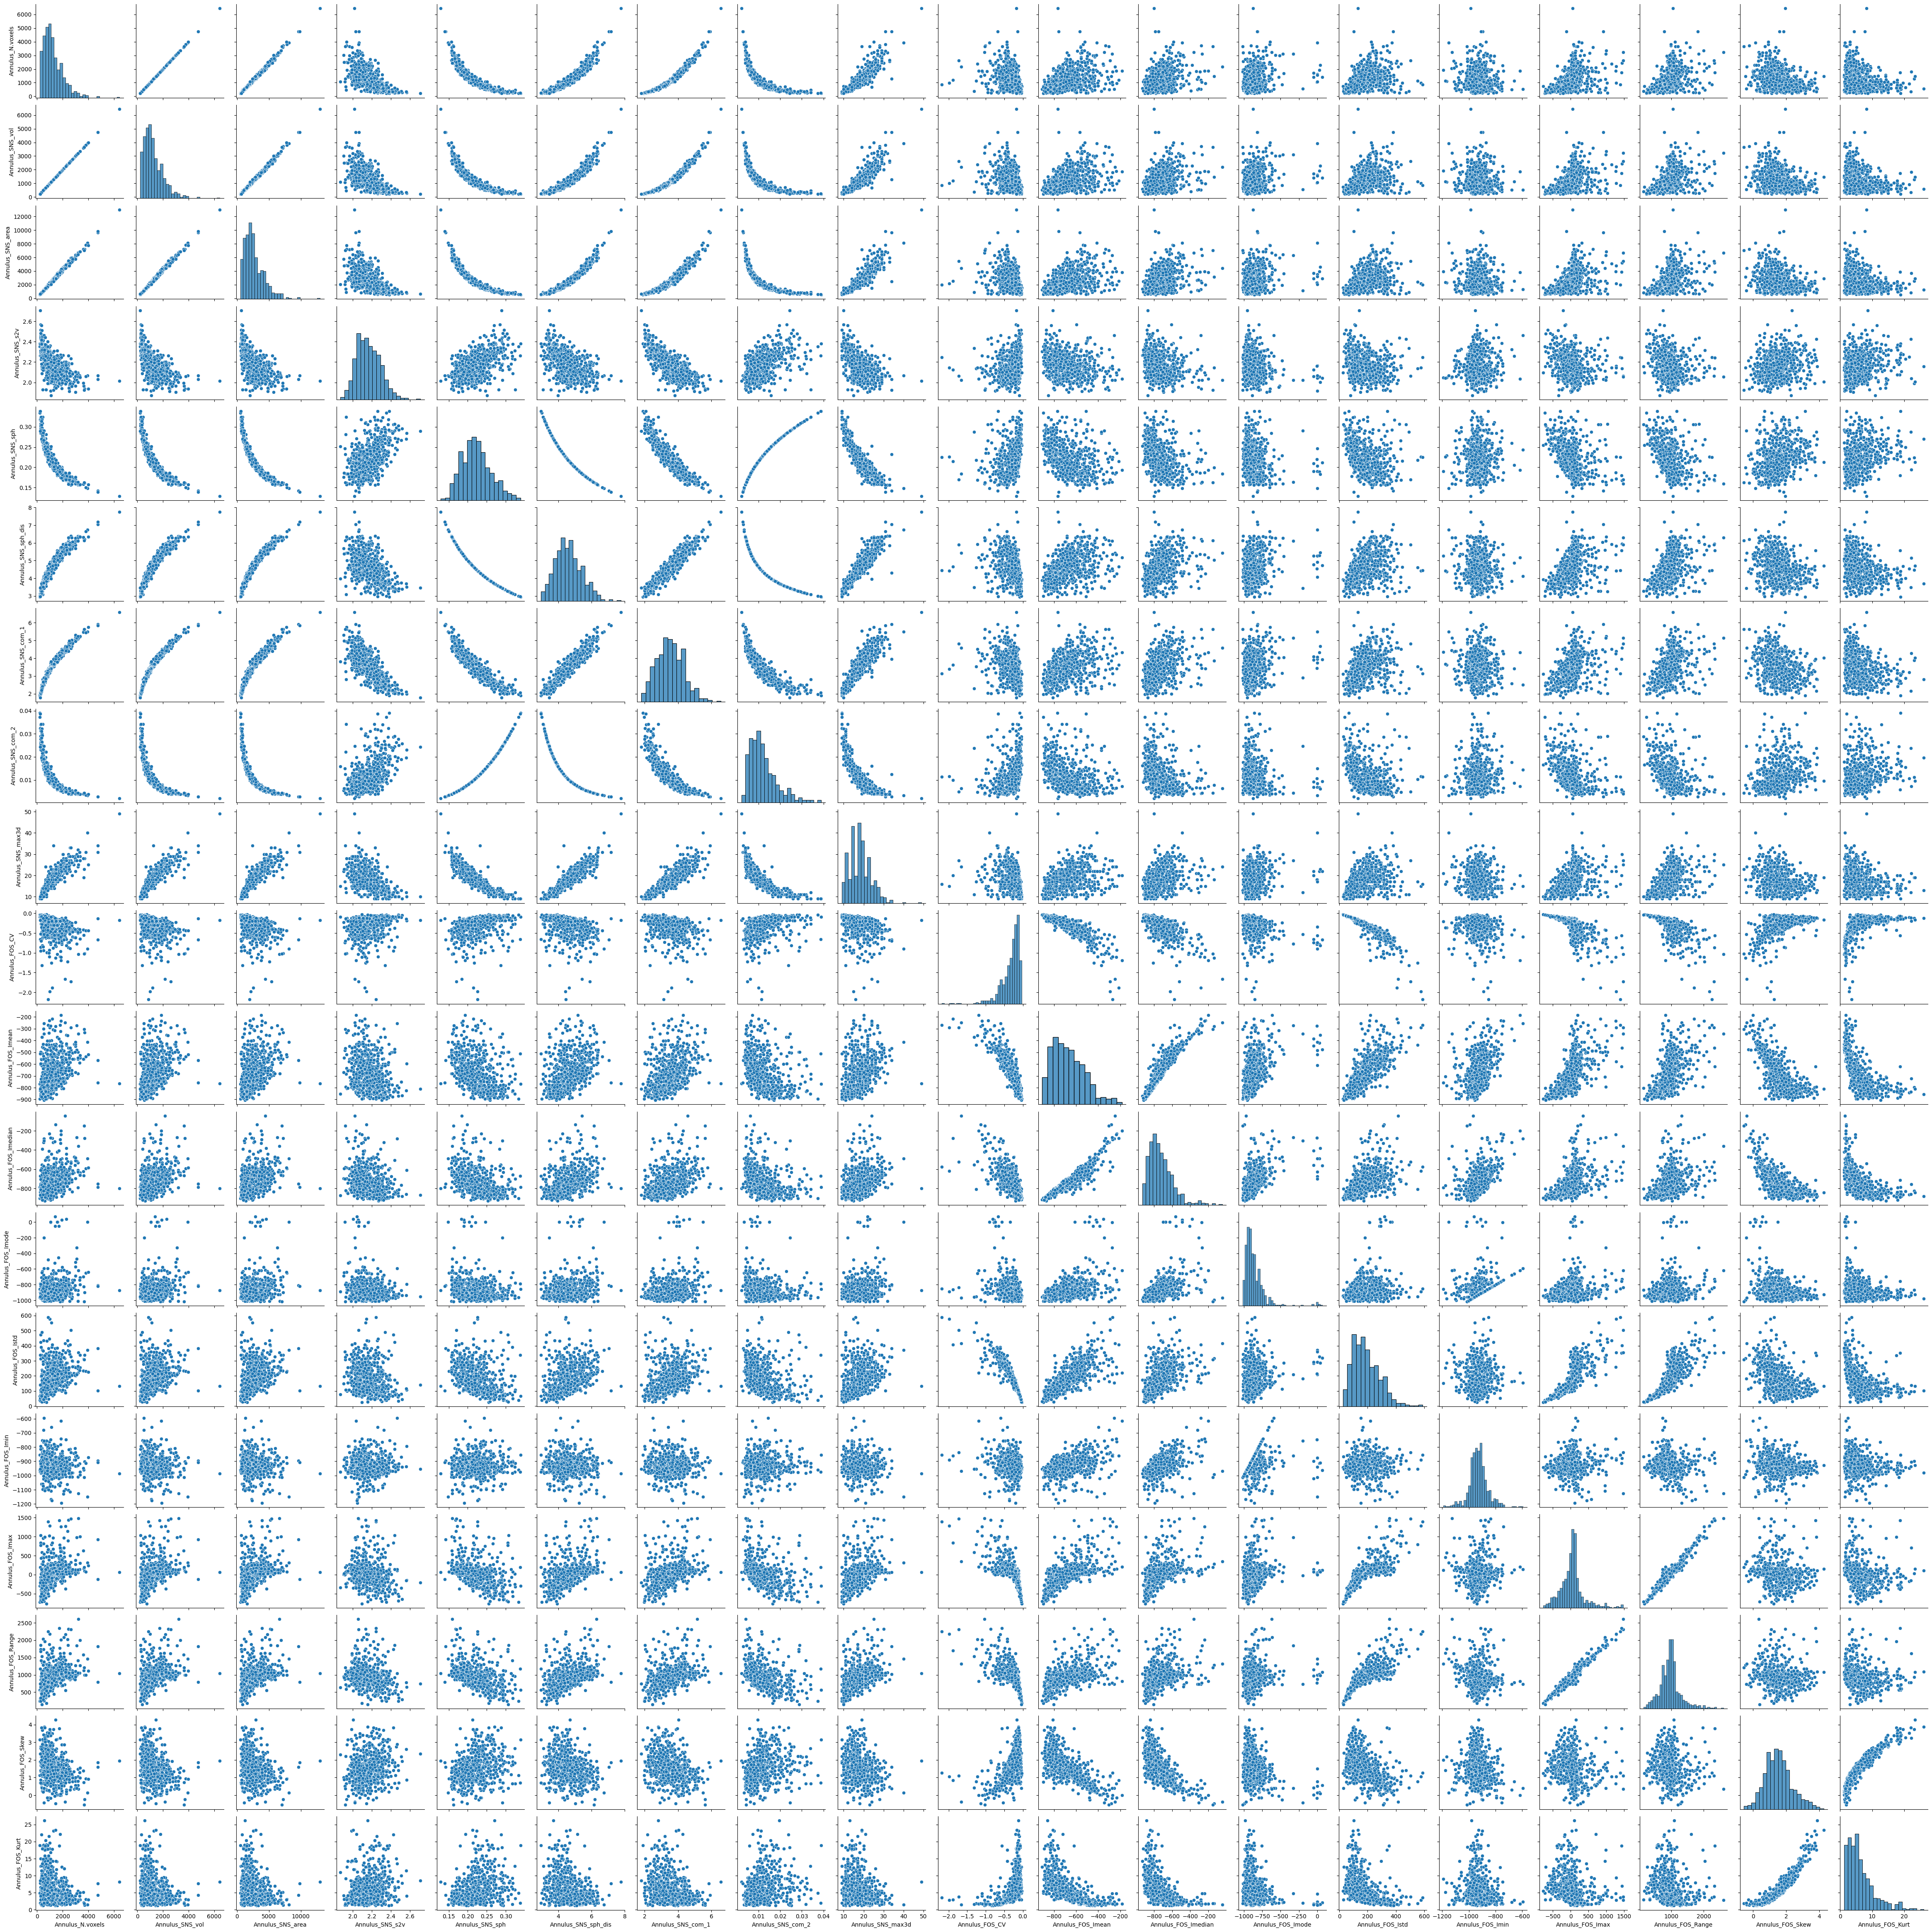

In [6]:
#Pairplot correlation check in chunks
chunks_20 = lung_train_df.iloc[:,:20]
sns.pairplot(chunks_20)
plt.show();

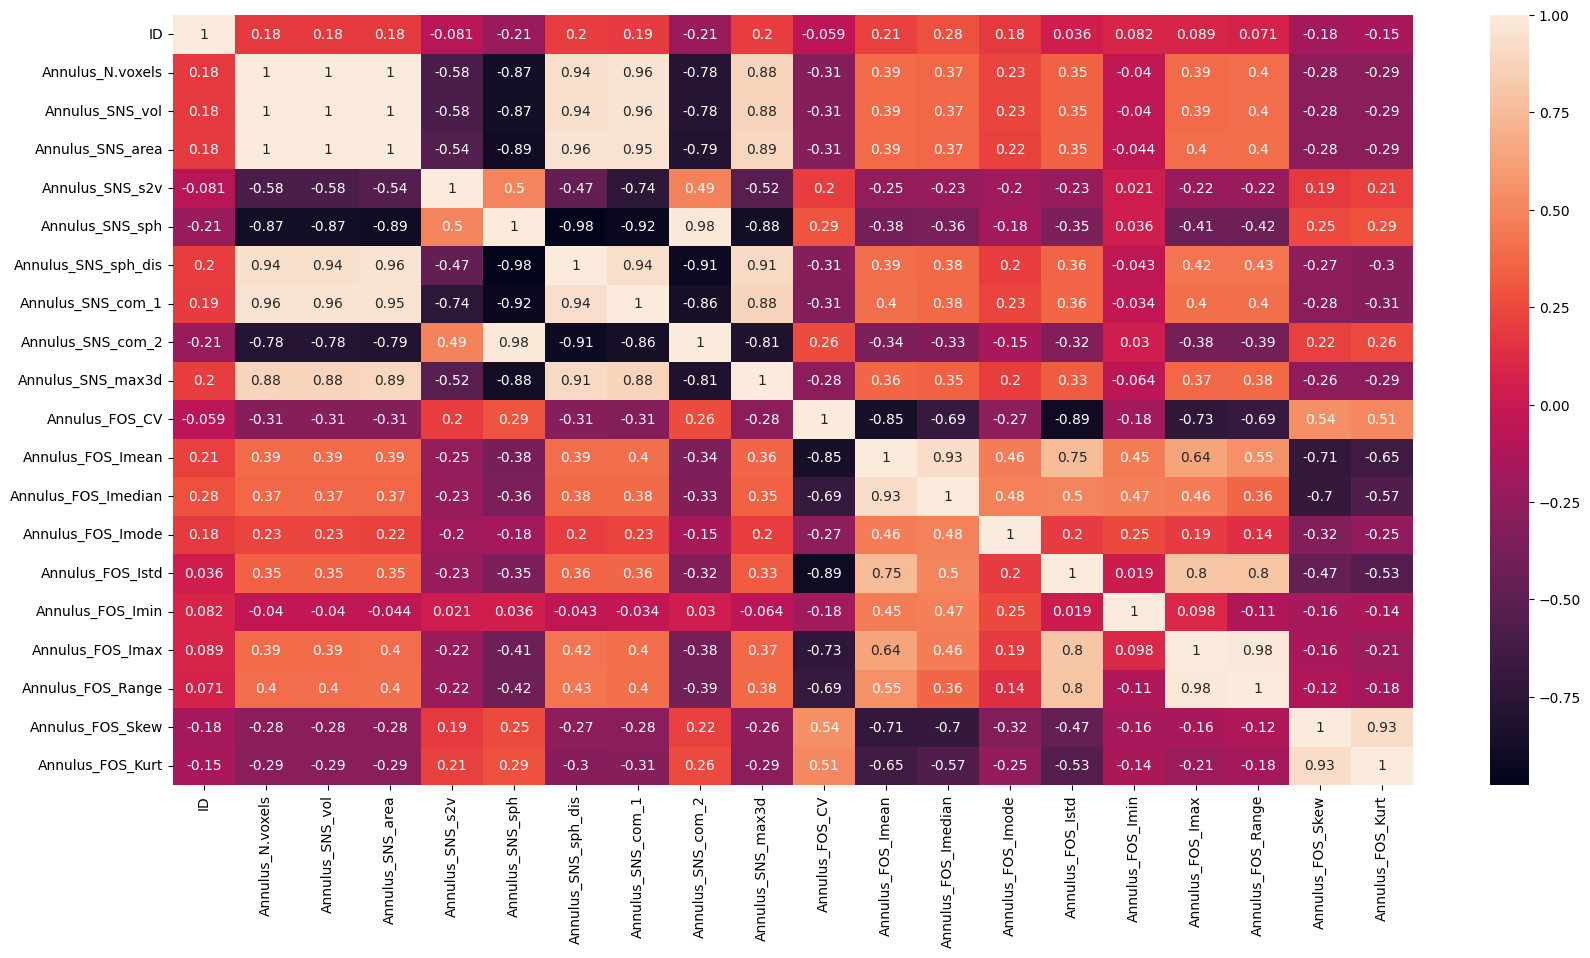

In [7]:
# statistical correlation for chunks_20
chunks_20 = lung_train_df.iloc[:,:20]

plt.figure(figsize=(20,10))
sns.heatmap(chunks_20.corr(),annot = True)
plt.show();

In [8]:
# load test dataset
lung_test_df = pd.read_csv("Lung Nodule/Lung Nodule/Features_Test.csv")
lung_test_df

ID  Annulus_N voxels  Annulus_SNS_vol  Annulus_SNS_area  \
0    0454_1              2297             2297              4624   
1    0455_1              1655             1655              3370   
2    0455_2              1960             1960              4172   
3    0455_3              1782             1782              3788   
4    0456_1               600              600              1322   
..      ...               ...              ...               ...   
122  0669_1               549              549              1200   
123  0670_1               987              987              2126   
124  0671_1               415              415               912   
125  0671_2               665              665              1420   
126  0671_3               473              473              1048   

     Annulus_SNS_s2v  Annulus_SNS_sph  Annulus_SNS_sph_dis  Annulus_SNS_com_1  \
0           2.013061         0.182071             5.492369           4.669182   
1           2.036254         0.200780             4.980586           4.154032   
2           2.128571         0.181542             5.508366           4.266957   
3           2.125701         0.187649             5.329102           4.137387   
4           2.203333         0.260228             3.842789           2.810317   
..               ...              ...                  ...                ...   
122         2.185792         0.270199             3.700970           2.742900   
123         2.154002         0.225493             4.434735           3.367958   
124         2.197590         0.295022             3.389576           2.489678   
125         2.135338         0.259464             3.854101           2.969759   
126         2.215645         0.280133             3.569738           2.586497   

     Annulus_SNS_com_2  Annulus_SNS_max3d  ...  Lesion_GLCM_sumEnt_HHH_25HUgl  \
0             0.006036                 23  ...                       1.039347   
1             0.008094                 22  ...                       1.044802   
2             0.005983                 22  ...                       1.056757   
3             0.006608                 21  ...                       1.047968   
4             0.017622                 15  ...                       1.310203   
..                 ...                ...  ...                            ...   
122           0.019727                 12  ...                       1.049768   
123           0.011466                 19  ...                       1.055271   
124           0.025678                 11  ...                       1.009543   
125           0.017467                 14  ...                       1.061595   
126           0.021983                 12  ...                       1.068244   

     Lesion_GLCM_difVar_HHH_25HUgl  Lesion_GLCM_difEnt_HHH_25HUgl  \
0                         0.245617                       0.987064   
1                         0.244690                       0.984586   
2                         0.251109                       1.008803   
3                         0.249339                       0.998092   
4                         0.423329                       1.351448   
..                             ...                            ...   
122                       0.243226                       0.980279   
123                       0.246555                       0.990005   
124                       0.235130                       0.956455   
125                       0.244005                       0.982547   
126                       0.244087                       0.982811   

     Lesion_GLCM_AutoCorrel_HHH_25HUgl  Lesion_GLCM_ClTend_HHH_25HUgl  \
0                             2.250009                       0.512441   
1                             2.256110                       0.522768   
2                             2.263776                       0.522695   
3                             2.238642                       0.513910   
4                            12.136032              

In [9]:
lung_test_df.describe()

Annulus_N voxels  Annulus_SNS_vol  Annulus_SNS_area  Annulus_SNS_s2v  \
count        127.000000       127.000000        127.000000       127.000000   
mean        1307.685039      1307.685039       2772.393701         2.155517   
std          708.548580       708.548580       1401.275950         0.108651   
min          281.000000       281.000000        704.000000         1.831512   
25%          808.000000       808.000000       1842.000000         2.101377   
50%         1151.000000      1151.000000       2466.000000         2.153846   
75%         1642.500000      1642.500000       3375.000000         2.213165   
max         4593.000000      4593.000000       8624.000000         2.533808   

       Annulus_SNS_sph  Annulus_SNS_sph_dis  Annulus_SNS_com_1  \
count       127.000000           127.000000         127.000000   
mean          0.217002             4.706506           3.608668   
std           0.031789             0.688110           0.713056   
min           0.151044             3.353599           1.988282   
25%           0.193508             4.267054           3.079498   
50%           0.214774             4.656054           3.533095   
75%           0.234354             5.167761           4.029682   
max           0.298187             6.620602           6.161915   

       Annulus_SNS_com_2  Annulus_SNS_max3d  Annulus_FOS_CV  ...  \
count         127.000000         127.000000      127.000000  ...   
mean            0.010883          18.362205       -0.323969  ...   
std             0.004905           4.242022        0.251910  ...   
min             0.003446          10.000000       -1.460214  ...   
25%             0.007246          15.000000       -0.399829  ...   
50%             0.009907          18.000000       -0.254642  ...   
75%             0.012871          21.000000       -0.153747  ...   
max             0.026513          30.000000       -0.045471  ...   

       Lesion_GLCM_sumEnt_HHH_25HUgl  Lesion_GLCM_difVar_HHH_25HUgl  \
count                     127.000000                     127.000000   
mean                        1.201145                       0.370259   
std                         0.234333                       0.252045   
min                         1.009543                       0.229669   
25%                         1.047257                       0.246057   
50%                         1.060965                       0.250365   
75%                         1.324307                       0.422944   
max                         2.228516                       2.210743   

       Lesion_GLCM_difEnt_HHH_25HUgl  Lesion_GLCM_AutoCorrel_HHH_25HUgl  \
count                     127.000000                         127.000000   
mean                        1.181391                           6.444135   
std                         0.285087                           7.243817   
min                         0.939842                           2.056056   
25%                         0.989039                           2.262195   
50%                         1.006352                           2.379460   
75%                         1.354665                           8.931524   
max                         2.423847                          64.038869   

       Lesion_GLCM_ClTend_HHH_25HUgl  Lesion_GLCM_Homoge1_HHH_25HUgl  \
count                     127.000000                      127.000000   
mean                        0.801954                        0.725615   
std                         0.611900                        0.057282   
min                         0.495895                        0.477924   
25%                         0.522223                        0.699934   
50%                         0.545374                        0.753321   
75%                         0.860095                        0.762657   
max                         5.291810                        0.780437   

       Lesion_GLCM_IDMN_HHH_25HUgl  Lesion_GLCM_IDN_HHH_25HUgl  \
count                   127.000000                  127.

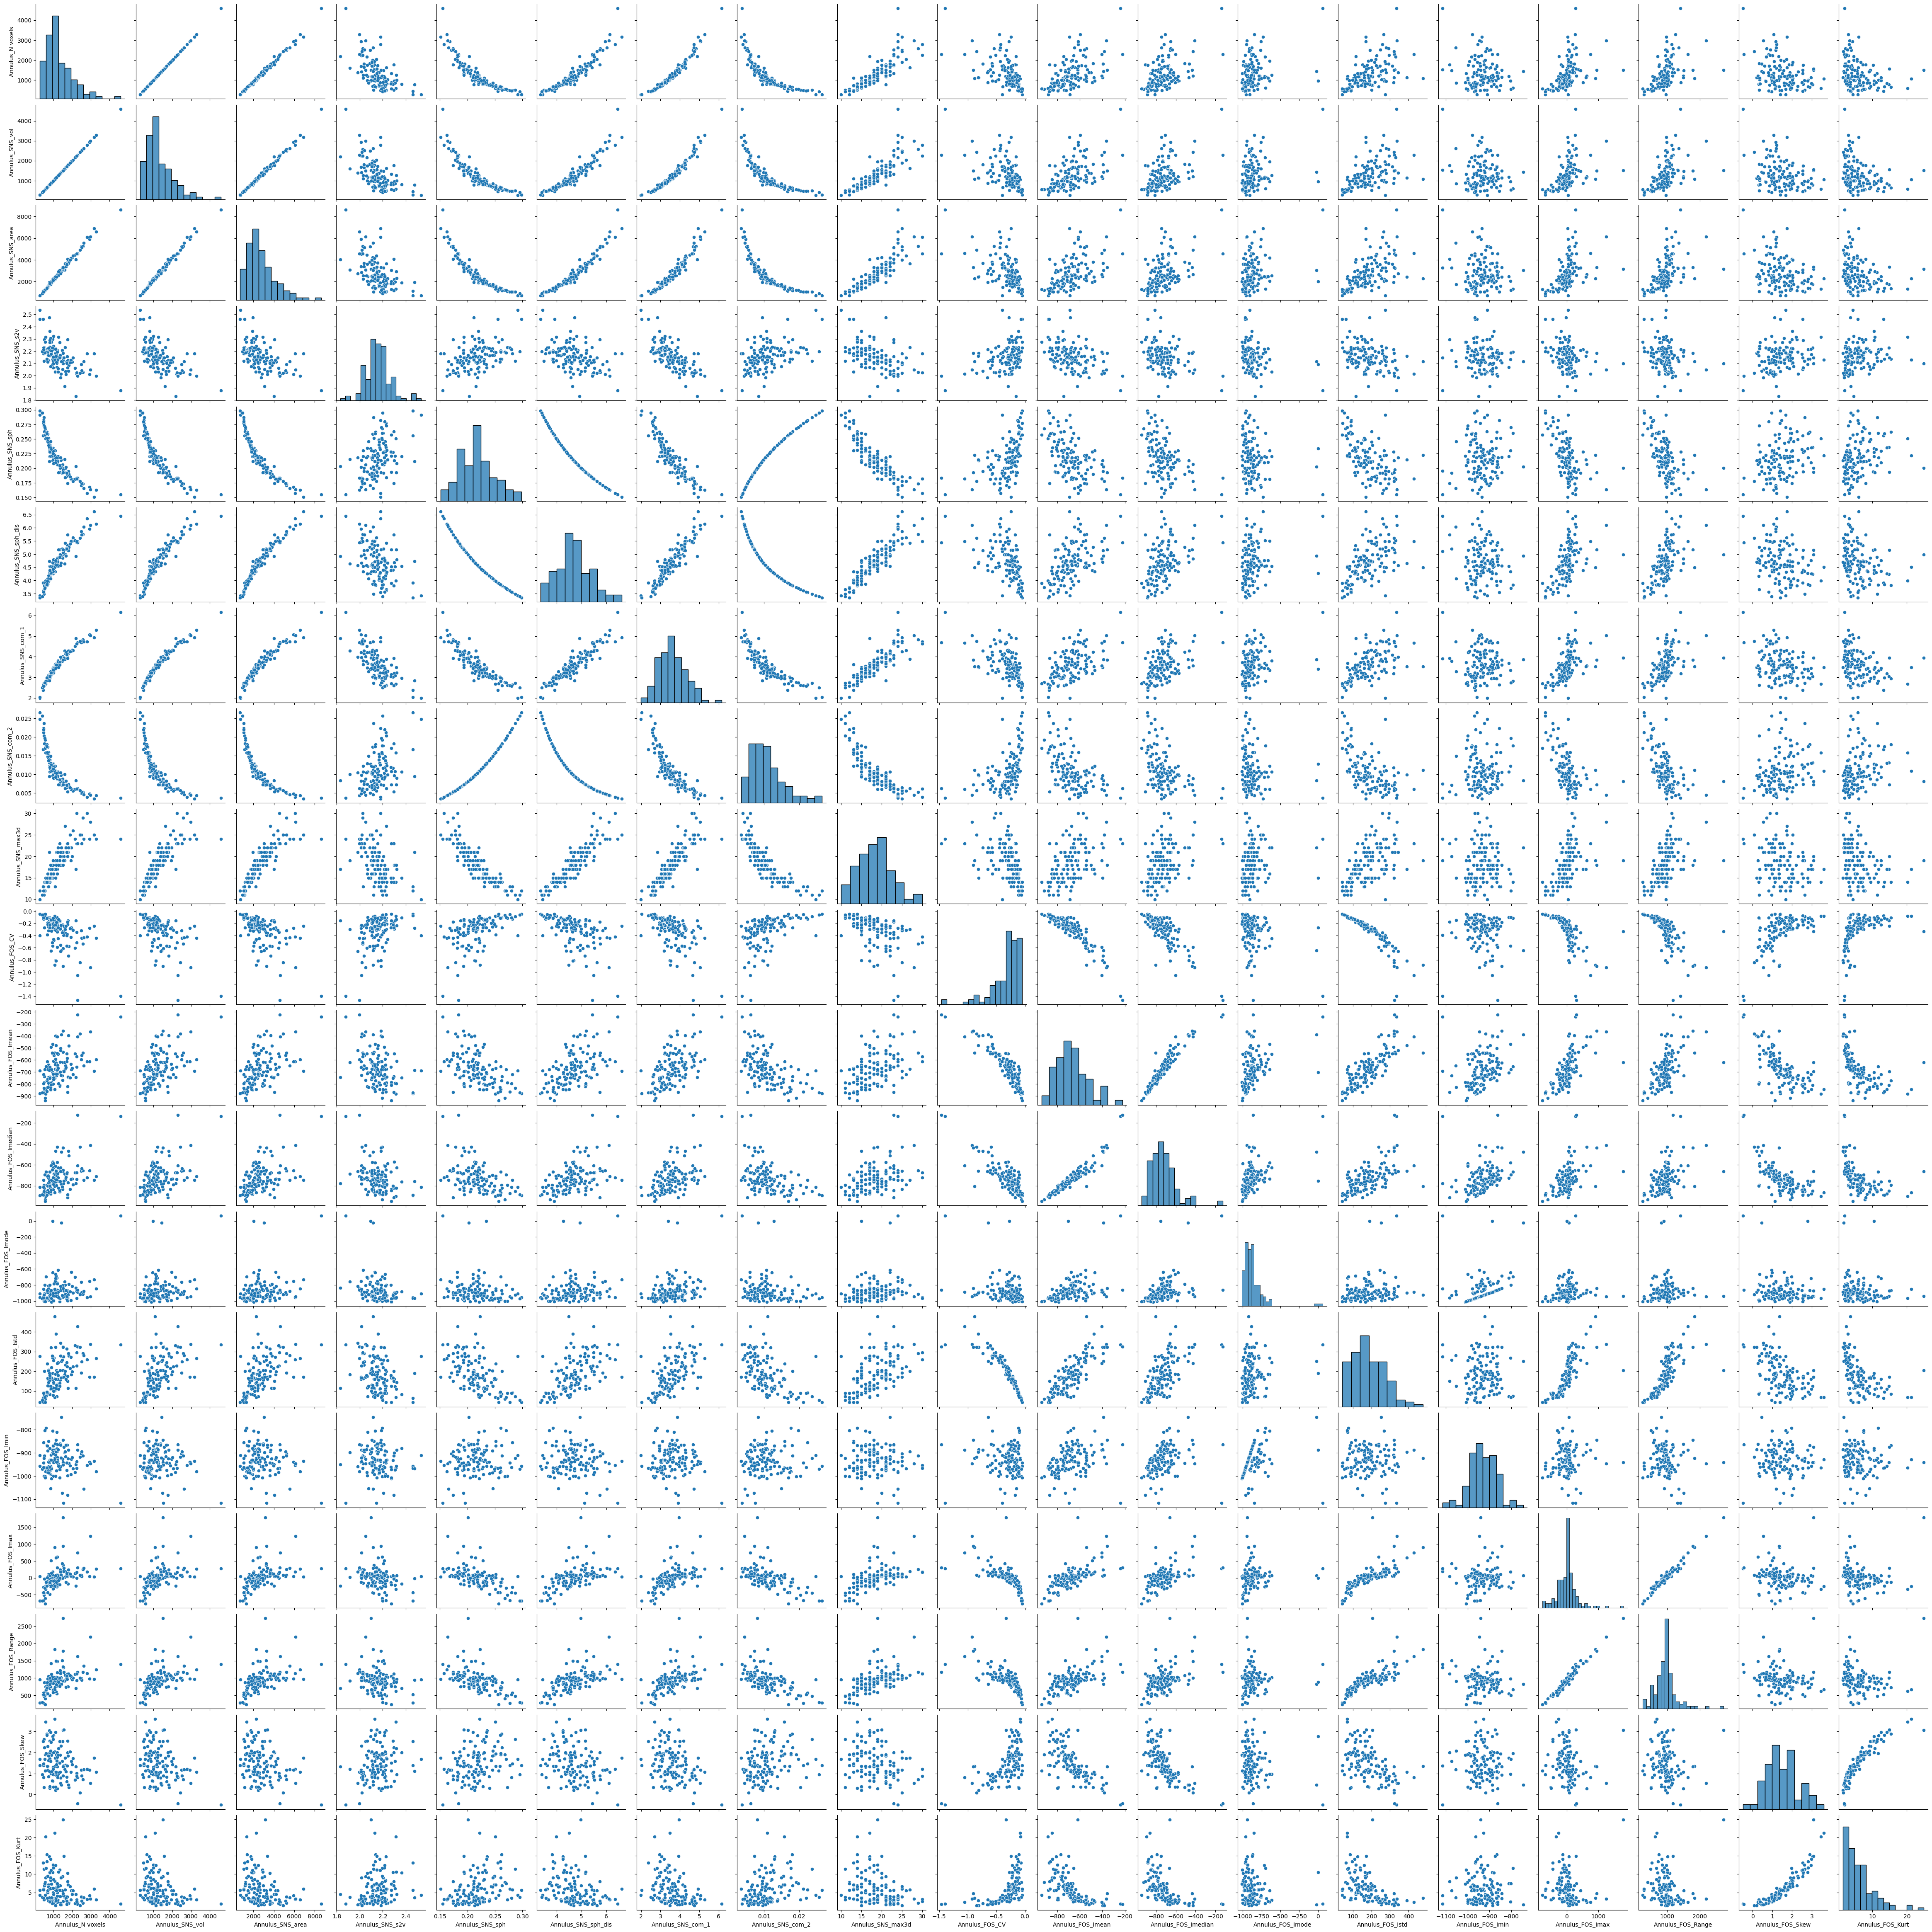

In [10]:
test_chunks_20 = lung_test_df.iloc[:,: 20]
sns.pairplot(test_chunks_20)
plt.show();

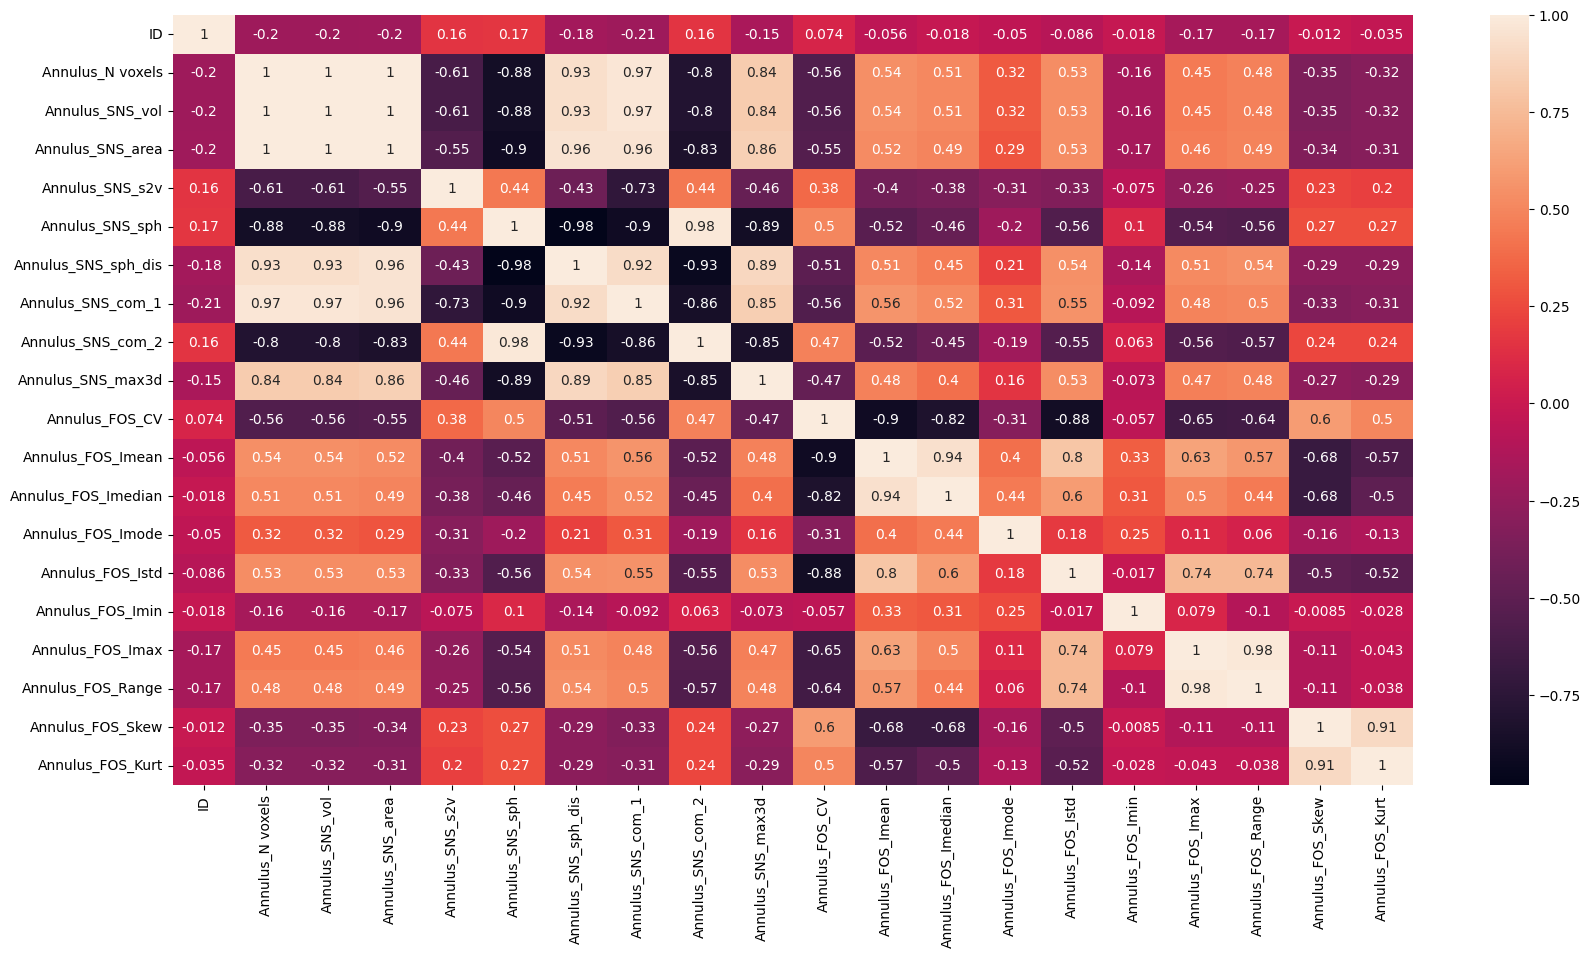

In [11]:
plt.figure(figsize=(20,10))

sns.heatmap(test_chunks_20.corr(),annot = True)
plt.show();

In [12]:
lung_train_df.drop("ID", axis = 1,inplace = True)

In [13]:
lung_test_df.drop("ID",axis = 1,inplace = True)

In [14]:
y1_train = lung_train_df.iloc[:,-1]
x1_train = lung_train_df.iloc[:,:-1]

y1_test =  lung_test_df.iloc[:,-1]
x1_test =  lung_test_df.iloc[:,:-1]

In [15]:
# Y_train
Y = lung_train_df.iloc[:,-1]
y_train = Y[:450]

# Y_test
Yes =  lung_test_df.iloc[:,-1]
y_test = Yes.loc[:126]

# y_validation
y_val = Y[450:]

# X_train
X = lung_train_df.iloc[:,:-1]
x_train = X[:450]

# x_test
xes =  lung_test_df.iloc[:,:-1]
x_test = xes.loc[:126]

# x_validation
x_val = X[450:]
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(127, 1998)
(450, 1998)
(450,)
(127,)
(159, 1998)
(159,)


In [16]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
#scale.fit(x_test)
xn_test = scale.fit_transform(x1_test)
xn_train = scale.fit_transform(x1_train)
x_val = scale.fit_transform(x_val)

In [17]:
from sklearn.decomposition import PCA
pca = PCA( n_components = 20)
xl_test = pca.fit_transform(xn_test)

pca.explained_variance_

array([671.03364566, 253.63930408, 112.04650195,  86.68379198,
        67.88350599,  55.55788943,  49.97038793,  47.37589324,
        42.01005881,  36.43336864,  28.47019368,  27.29089129,
        25.11925215,  22.93152863,  21.58661663,  19.02714872,
        18.10087378,  17.74776615,  16.49582949,  15.78153226])

In [18]:
from sklearn.decomposition import PCA
pca1 = PCA( n_components = 20)
xl_train = pca1.fit_transform(xn_train)

pca1.explained_variance_

array([607.484526  , 242.69298417, 127.41039478, 104.9111919 ,
        65.67819463,  54.94129759,  43.46436598,  38.93903321,
        38.10682496,  30.51957159,  26.09339626,  24.20739   ,
        22.22908477,  21.13389741,  18.56629227,  17.44546614,
        16.20834685,  13.94130368,  13.45541641,  12.92628321])

In [19]:
# from sklearn.decomposition import PCA
# pca2 = PCA( n_components = 10)
# xi_val = pca2.fit_transform(x_val)

# pca2.explained_variance_

In [20]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier()
rand.fit(xn_train,y1_train)

rand_pred = rand.predict(xn_test)


In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y1_test,rand_pred))
print("ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️")
print(confusion_matrix(y1_test,rand_pred))

              precision    recall  f1-score   support

           0       0.56      0.87      0.68        55
           1       0.83      0.47      0.60        72

    accuracy                           0.65       127
   macro avg       0.69      0.67      0.64       127
weighted avg       0.71      0.65      0.64       127

ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️
[[48  7]
 [38 34]]


In [100]:
# using ANN For classification
import tensorflow as tf

#set_seed
#tf.random.set_seed(42)

#create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000,activation = "relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(500,activation = "relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(500,activation = "relu"),
    tf.keras.layers.Dense(100,activation = "relu",kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])

model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ["accuracy"]
)

model_hist = model.fit(xl_train,y1_train,epochs = 100)

Epoch 1/100
20/20 [==============================] - 2s 20ms/step - loss: 4.5087 - accuracy: 0.5468
Epoch 2/100
20/20 [==============================] - 1s 25ms/step - loss: 1.5436 - accuracy: 0.6962
Epoch 3/100
20/20 [==============================] - 0s 23ms/step - loss: 1.2370 - accuracy: 0.6946
Epoch 4/100
20/20 [==============================] - 0s 19ms/step - loss: 1.0488 - accuracy: 0.7389
Epoch 5/100
20/20 [==============================] - 0s 19ms/step - loss: 0.9385 - accuracy: 0.7241
Epoch 6/100
20/20 [==============================] - 0s 18ms/step - loss: 0.9534 - accuracy: 0.7159
Epoch 7/100
20/20 [==============================] - 0s 19ms/step - loss: 0.8008 - accuracy: 0.7291
Epoch 8/100
20/20 [==============================] - 0s 18ms/step - loss: 0.7295 - accuracy: 0.7471
Epoch 9/100
20/20 [==============================] - 0s 17ms/step - loss: 0.6919 - accuracy: 0.7406
Epoch 10/100
20/20 [==============================] - 0s 17ms/step - loss: 0.6782 - accuracy: 0.7389

In [101]:
model.evaluate(xl_test,y1_test)

4/4 [==============================] - 0s 5ms/step - loss: 1.0830 - accuracy: 0.6850


[1.0830296277999878, 0.6850393414497375]

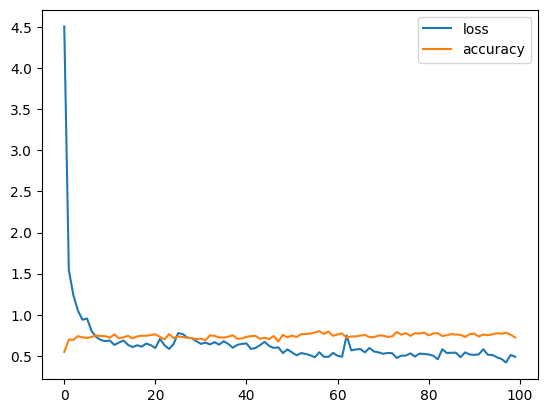

In [102]:
pd.DataFrame(model_hist.history).plot();

In [103]:
from sklearn.metrics import classification_report, confusion_matrix
mod_pred = model.predict(xl_test)
# Convert probabilities to binary predictions
mod_pred_binary = (mod_pred > 0.5).astype(int)

# Print classification report and confusion matrix
print(classification_report(y1_test, mod_pred_binary))
print("ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️")
print(confusion_matrix(y1_test, mod_pred_binary))

print(tf.squeeze(mod_pred_binary))
print("ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️")
print(list(y1_test))

4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.64      0.62      0.63        55
           1       0.72      0.74      0.73        72

    accuracy                           0.69       127
   macro avg       0.68      0.68      0.68       127
weighted avg       0.68      0.69      0.68       127

ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️
[[34 21]
 [19 53]]
tf.Tensor(
[1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0], shape=(127,), dtype=int32)
ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️ℹ️
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

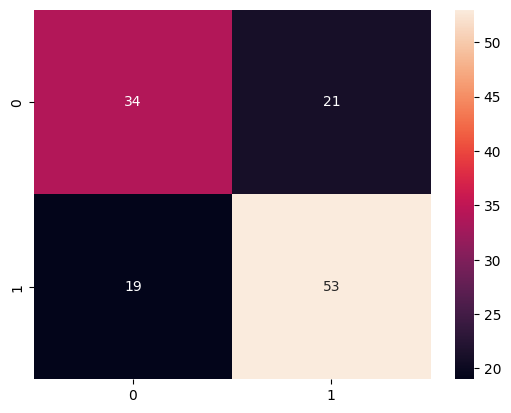

In [104]:
sns.heatmap(confusion_matrix(y1_test, mod_pred_binary),annot = True)
plt.show();